In [1]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

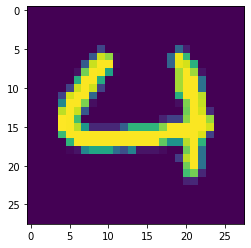

In [4]:
plt.imshow(train_data[60])

In [5]:
train_labels[60]

4

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax"))

In [7]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype("float32")/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype("float32")/255

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
train_labels[5]

2

In [12]:
#Transformamos los datos a vectores para que sea mas facil para el algoritmo poder identificar los numeros
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
#Entrenamos la red neuronal
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2579 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1051 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0387 - accuracy: 0.9883


In [14]:
#Probamos nuestra red neuronal con evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9796


[0.06681670248508453, 0.9796000123023987]